Enter the no of vertices: 4
You can enter Coordinates of vertices in random order.
Enter coordinates of vertex 1
Enter the x coordinate: 1
Enter the y coordinate: 1
[1, 1]
Enter coordinates of vertex 2
Enter the x coordinate: 10
Enter the y coordinate: 5
[10, 5]
Enter coordinates of vertex 3
Enter the x coordinate: 15
Enter the y coordinate: 2
[15, 2]
Enter coordinates of vertex 4
Enter the x coordinate: 12
Enter the y coordinate: 20
[12, 20]
List of vertices before sorting:
 [[1, 1], [10, 5], [15, 2], [12, 20]]
((10, 15, 12, 1), (5, 2, 20, 1))
list of vertices after sorting:
(1,1)
(10,5)
(15,2)
(12,20)


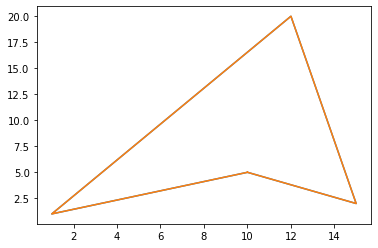

At Point(15,2)
Points to be considered: (10,5) (15,2) (12,20)
Left Turn
At Point(12,20)
Points to be considered: (15,2) (12,20) (1,1)
Left Turn
At Point(1,1)
Points to be considered: (12,20) (1,1) (10,5)
Left Turn
At Point(10,5)
Points to be considered: (1,1) (10,5) (15,2)
Right Turn
No of left turn is:3and No of Right turn is:1 so, Polygon is a Concave


In [2]:

import matplotlib.pyplot as plt
import numpy as np
def Polygon():
    listofvertices=[]
    vertices=[]
    n = int(input("Enter the no of vertices: "))
    print("You can enter Coordinates of vertices in random order.")
    for i in range(0, n):
        print("Enter coordinates of vertex", i+1)
        x=int(input("Enter the x coordinate: "))
        y=int(input("Enter the y coordinate: "))
        vertices.append(x)
        vertices.append(y)
        print(vertices)
        listofvertices.append(vertices)
        vertices=[]
        
    print("List of vertices before sorting:\n", listofvertices)
    xs, ys = zip(*listofvertices)#creating list of x coordinates and y coordinates
    x=list(xs)
    y=list(ys)

    a=sortAntiClock(x,y) #sorting anticlockwise according to angle 
    print(a)
    print("list of vertices after sorting:")
    for i in range(0, n):    
        print("("+str(x[i])+","+str(y[i])+")")
        
    x=list(a[0])
    y=list(a[1])
    x.append(x[0])
    y.append(y[0])
    
    plt.plot(x,y,'-')
    plt.plot(x,y) 
    plt.show()
    
    left,right=turnTest(x,y,n) #performing turn test    
    checkConvex(left, right)#checking convexity
    
#end of function Polygon    
    
def sortAntiClock(x,y):
    reference_point = [np.average(x), np.average(y)]
    angles = np.arctan2(x-reference_point[0],y-reference_point[1])
    sorted_tuple = sorted([(i,j,k) for i,j,k in zip(x,y,angles)], key = lambda item: item[2],reverse=True)
    x,y,angles = zip(*sorted_tuple)  
    return x,y
#end of function sortAntiClock

def turnTest(x,y,n):
    noOfLeftTurn=0
    noOfRightTurn=0
    for i in range(n):
        print("At Point("+str(x[i+1])+","+str(y[i+1])+")")
        if(i<=n-2):
            print("Points to be considered: ("+str(x[i])+","+str(y[i])+")","("+str(x[i+1])+","+str(y[i+1])+")","("+str(x[i+2])+","+str(y[i+2])+")")
            turntest=(x[i+1]-x[i])*(y[i+2]-y[i])-(y[i+1]-y[i])*(x[i+2]-x[i])
        else:
            print("Points to be considered: ("+str(x[i])+","+str(y[i])+")","("+str(x[i+1])+","+str(y[i+1])+")","("+str(x[1])+","+str(y[1])+")")
            turntest=(x[i+1]-x[i])*(y[1]-y[i])-(y[i+1]-y[i])*(x[1]-x[i])
            
        if(turntest>0):
            print("Left Turn")
            noOfLeftTurn=noOfLeftTurn+1
        elif(turntest<0):
            print("Right Turn")
            noOfRightTurn=noOfRightTurn+1
        else:
            print("Collinear")
            
    return noOfLeftTurn,noOfRightTurn
#end of function turnTest


def checkConvex(left,right):
    if(left==0):
        if(right==0):
            print("All Points are Collinear")
        else:
            print("No of left turn is"+str(left)+" i.e All turn are left so, Polygon is a Convex polygon")
 
    else:
        print("No of left turn is:"+str(left)+"and No of Right turn is:"+str(right)+" so, Polygon is a Concave")
#end of function checkConvex
        
Polygon() #calling polygon function